# TKT4108 Structural Dynamics 2

## Exercise 11

**Main topics:** Wind

**References:** Github examples, lecture notes


### Problem 1: Auto spectral density of wind turbulence

**a)**

The symbol $\sigma_u^2$ represents the variance of the turbulence component. The parameter $A_u$ controls, together with the integral length scale, how much energy is in the spectra located at low frequencies. The integral length scale ${}^x{L_u}$ can be viewed as an average eddy length. Increasing the integral length scale moves the frequency content in the turbulence to lower frequencies.


**b)** 


The relation between the frequencies is $\omega = 2 \pi f$. We also need to ensure that the variance of the process stays the same by keeping the area under the spectral density equal. By going from a frequency in Hz to a frequency in rad/s, we stretch the frequency axis and make the area larger. We thus need to divide the spectral density by $2\pi$ to keep the area the same.

<img src='fig_psd.svg'>

We can then insert this into the equation. We start by converting the reduced frequency:

$$\hat{f}_u = \frac{f {}^xL_u}{V} $$

$$\hat{\omega}_u = \frac{\omega {}^xL_u}{V} $$

$$\hat{\omega}_u = 2 \pi \hat{f}_u $$

We can then introduce the relations in the auto-spectral density of the turbulence component:

$$\frac{S_u(\omega) 2 \pi \frac{\omega}{2 \pi}}{\sigma_u^2} = \frac{ A_{u} \frac{\hat{\omega_u}}{2\pi}}{\left(1+ 1.5 A_u \frac{\hat{\omega_u}}{2\pi}  \right)^{\frac{5}{3}}} $$


$$\frac{S_u(\omega) \omega }{\sigma_u^2} = \frac{  \frac{A_{u}}{2\pi} \hat{\omega_u}}{\left(1+ 1.5  \frac{A_u}{2\pi} \hat{\omega_u}  \right)^{\frac{5}{3}}} $$    

**c)**


(0.01, 100)

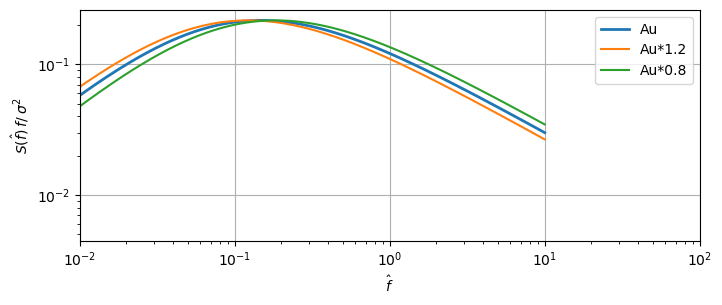

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Au = 6.8
f_hat = np.arange(0.001,10,0.001)

def Su_norm(f_hat,Au):
    Su_n = Au*f_hat / ((1 + 1.5 * Au* f_hat)**(5/3))
    return Su_n

plt.figure(figsize=(8,3))
plt.plot(f_hat,Su_norm(f_hat,Au),label = 'Au', linewidth=2 )
plt.plot(f_hat,Su_norm(f_hat,1.2*Au),label = 'Au*1.2' )
plt.plot(f_hat,Su_norm(f_hat,0.8*Au),label = 'Au*0.8' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\hat{f}$')
plt.ylabel('$ S(\hat{f}) \: f / \: \sigma^2 $')
plt.grid()
plt.legend()

plt.xlim(0.01, 100)

The plot shows that the parameter $A_u$ controls the peak position in the reduced (normalized) auto-spectral density. The peak moves to the left when $A_u$ increases and to the right when it decreases.

A higher $A_u$ means that the energy is shifted more towards lower frequencies. Note that all three curves have equal total energy; in other words, the area under the curves is the same.

### Problem 2: Co-spectral density of wind turbulence


**a)** 

The standard deviation can be obtained from the turbulence intensity and the mean wind velocity $\sigma_{u_1} = I_uV$.


(0.0, 50.0)

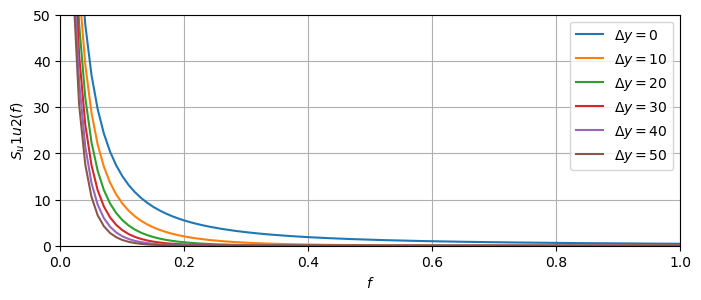

In [3]:

f_axis=np.arange(0.0001,10,0.01)

Iu = 0.15
V = 20.0
xLu = 100.0
Cu = 10.0

f_hat=f_axis*xLu/V

dy = np.array([0, 10, 20, 30, 40, 50])

plt.figure(figsize=(8,3))
for k in range(len(dy)):

    sigma_u=Iu*V
    Su=sigma_u**2/f_axis*Au*f_hat/(1+1.5*Au*f_hat)**(5/3)

    S_u1u2=Su*np.exp(-Cu*f_axis*dy[k]/V)
    
    plt.plot(f_axis,S_u1u2,label= '$\Delta y= $' + str(dy[k]) )

plt.grid()
plt.legend()
plt.xlabel('$f$')
plt.ylabel('$S_u1u2(f)$')
plt.xlim(0,1)
plt.ylim(0,50)


**b)**
  
The correlation coefficient is defined as follows

$$ \rho(\Delta y) = \frac{\sigma_{u_1u_2} (\Delta y)}{\sigma_{u_1} \sigma_{u_2} } $$

Here $\sigma_{u_1u_2} (\Delta y)$ is the covariance of the turbulence at a separation distance $\Delta y$ and $\sigma_{u_1}$, and $\sigma_{u_2}$ are the standard deviation of the turbulence in point 1 and 2. 

C:\Users\oyvinpet\AppData\Local\Temp\ipykernel_21084\1146958738.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  rho_u1u2[k]=np.trapz(S_u1u2,f_axis)/sigma_u**2


Text(0, 0.5, '$\\rho$')

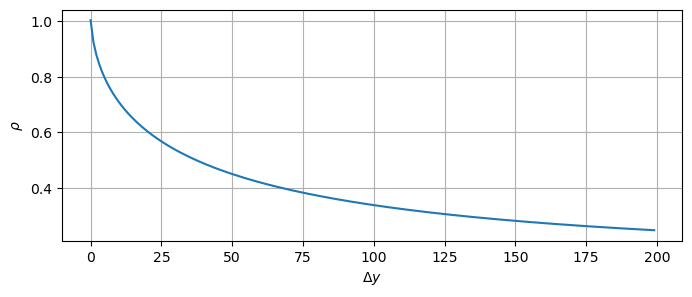

In [4]:
dy = np.arange(0,200.0,1.0)

rho_u1u2=np.zeros_like(dy)

for k in range(len(dy)):

    sigma_u=Iu*V
    Su=sigma_u**2/f_axis*Au*f_hat/(1+1.5*Au*f_hat)**(5/3)
    
    S_u1u2=Su*np.exp(-Cu*f_axis*dy[k]/V)

    rho_u1u2[k]=np.trapz(S_u1u2,f_axis)/sigma_u**2
    
plt.figure(figsize=(8,3))
plt.plot(dy,rho_u1u2)
plt.grid()
plt.xlabel(r'$\Delta y$')
plt.ylabel(r'$\rho$')
#plt.xlim(0,1)
#plt.ylim(0,20)

For $\Delta y=0$, the correlation coefficient is 1. This is because we compare the process directly with itself.

The correlation fades towards zero for two points that are longer apart.

### Problem 3: Recorded wind data


Length of time series in seconds:
600.0
Sample rate in Hz:
2.0


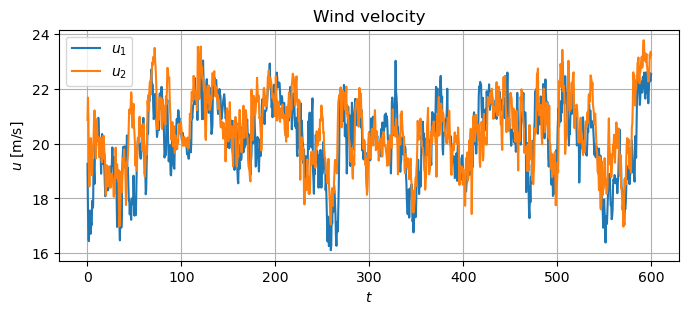

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as spsi

t=np.loadtxt('wind_data_hardanger.txt',delimiter=',',skiprows=1, usecols=[0]).T # Import time vector

u=np.loadtxt('wind_data_hardanger.txt',delimiter=',',skiprows=1, usecols=range(1,3)).T # Import wind data

print('Length of time series in seconds:')
print(t[-1])

dt=t[2]-t[1]
fs=1/dt

print('Sample rate in Hz:')
print(fs)

plt.figure(figsize=(8,3))
plt.plot(t,u[0,:],label='$u_1$')
plt.plot(t,u[1,:],label='$u_2$')
plt.title('Wind velocity')
plt.ylabel('$u$ [m/s]')
plt.xlabel('$t$')
plt.grid()
plt.legend()


**a)** 


In [6]:
V_1=np.mean(u[0,:])
V_2=np.mean(u[1,:])

print('Mean wind speed for u1 is ' + '{:.2f}'.format(V_1) + ' m/s')
print('Mean wind speed for u2 is ' + '{:.2f}'.format(V_2) + ' m/s')

Iu_1=np.std(u[0,:])/V_1
Iu_2=np.std(u[1,:])/V_2

print('Turbulence intensity for u1 is ' + '{:.2f}'.format(Iu_1*100 ) + ' %')
print('Turbulence intensity for u2 is ' + '{:.2f}'.format(Iu_2*100) + ' %')


Mean wind speed for u1 is 20.14 m/s
Mean wind speed for u2 is 20.46 m/s
Turbulence intensity for u1 is 6.79 %
Turbulence intensity for u2 is 6.10 %


The values are very similar (within a tolerance for estimation uncertainty). The wind field is homogenuous.

**b)** 


A sample rate of $2$ Hz means that frequency content between $0$ and $1$ Hz is preserved. However, this means that we disregard turbulence for $>1$ Hz. Atmospheric wind turbulence is concentrated in the lower frequency range, so this is sufficient for most applications. 

One exception is if we had a structure with natural frequency over 1 Hz and we wanted to study it's dynamic response to wind loads.


**c)** 


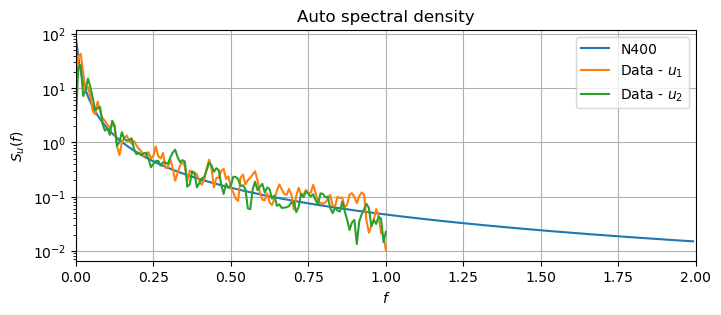

In [10]:
# Spectrum from N400
xLu=180 # Length scale
Au=6.8 # Spectral parameter
V=20.1 # Mean, from measurements
sigma_u=0.06*V # Standard deviation, from measurements

f_axis=np.arange(0.001,2,0.01)

f_hat=f_axis*xLu/V
Su=sigma_u**2/f_axis*Au*f_hat/(1+1.5*Au*f_hat)**(5/3)

# Spectrum from data
npoints_window = np.ceil(len(t)/5)
nfft_pow2 = 2**(np.ceil(np.log2(npoints_window))) # Next power of 2, to make the FFT more efficient

f_welch, Su1_welch = spsi.csd(u[0,:],u[0,:], fs=fs, window='hann', nperseg=npoints_window, nfft=nfft_pow2 , detrend='constant')
f_welch, Su2_welch = spsi.csd(u[1,:],u[1,:], fs=fs, window='hann', nperseg=npoints_window, nfft=nfft_pow2 , detrend='constant')

plt.figure(figsize=(8,3))
plt.plot(f_axis,Su,label='N400')
plt.plot(f_welch,Su1_welch,label='Data - $u_1$')
plt.plot(f_welch,Su2_welch,label='Data - $u_2$')
plt.title('Auto spectral density')
plt.grid()
plt.legend()
plt.xlabel('$f$')
plt.ylabel(r'$S_u(f)$')
plt.xlim(0,2)
plt.yscale('log')

The match between the observations and the theoretical models is rather good.

**d)** 


In [8]:
rho_u1u2=np.corrcoef(u[0,:],u[1,:])

rho_u1u2=rho_u1u2[0,1]

print('Correlation coefficient is ' + '{:.2f}'.format(rho_u1u2*100) + ' %')

Correlation coefficient is 65.87 %


**e**)

(0.0, 0.5)

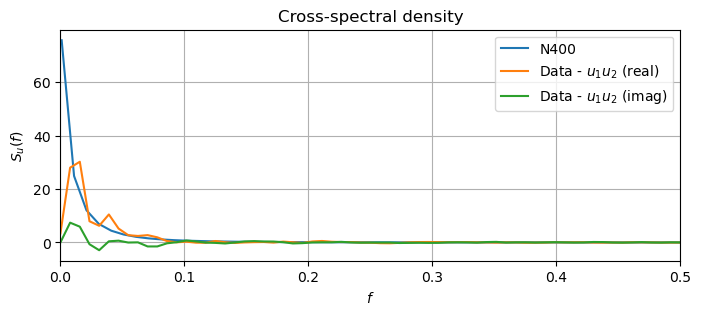

In [9]:
# Spectrum from N400
Cu=10.0
dy=20

Co=np.exp(-Cu*f_axis*dy/V) # Coherence
Su1u2=Su*Co # Cross-spectral density

# Spectrum from data
npoints_window = np.ceil(len(t)/5)
nfft_pow2 = 2**(np.ceil(np.log2(npoints_window))) # Next power of 2, to make the FFT more efficient

f_welch, Su1u2_welch = spsi.csd(u[0,:],u[1,:], fs=fs, window='hann', nperseg=npoints_window, nfft=nfft_pow2 , detrend='constant')

plt.figure(figsize=(8,3))
plt.plot(f_axis,Su1u2,label='N400')
plt.plot(f_welch,np.real(Su1u2_welch),label='Data - $u_1 u_2$ (real)')
plt.plot(f_welch,np.imag(Su1u2_welch),label='Data - $u_1 u_2$ (imag)')
plt.title('Cross-spectral density')
plt.grid()
plt.legend()
plt.xlabel('$f$')
plt.ylabel(r'$S_u(f)$')
plt.xlim(0,0.5)
#plt.yscale('log')

Also here, the correspondence between theory and observations is not bad. We see that most of the correlation comes from the lower frequency range. At higher frequencies, the wind turbulence consists of smaller eddies, which do not provide any correlation for two points that are 20 m apart.

Note that we struggle slightly with frequency resolution. Dividing the data into fewer segments in Welch's method would provide a better resolution but also lead to a more noisy spectrum due to a lower averaging effect.

